In [ ]:
# import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

In [ ]:
# define directories for train and test datasets
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test' 

In [ ]:
# function to create a dataframe containing image paths and labels
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(label)
            print(label, "completed")
        return image_paths, labels

In [ ]:
# create a dataframe for training images
train = pd.DataFrame()
train['imaage'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry co

In [ ]:
# create a dataframe for testing images
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry co

In [ ]:
# function to extract features from images
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale = True, target_size=(48,48))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [ ]:
# extract features from training and testing images
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

# normalize pixel values for better model performance
x_train = train_features/255.0
x_test = test_features/255.0

  0%|          | 0/28821 [00:00<?, ?it/s]c:\Users\gauri\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 7066/7066 [00:32<00:00, 219.14it/s]


In [ ]:
# encode labels into integers and one-hot encode them
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [ ]:
# load the VGG16 base model(pre-trained on ImageNet)
vgg16_base = VGG16(weights = 'imagenet', include_top = False, input_shape=(48,48,3))

58889256/58889256 [==============================] - 62s 1us/step


In [ ]:
# repeat grayscale channels to convert images to 3-channel format for VGG16
x_train = np.repeat(x_train, 3, axis = -1)
x_test = np.repeat(x_test, 3, axis = -1)

In [ ]:
# freeze layers of VGG16 to retained pre-trained weights
for layer in vgg16_base.layers:
    layer.trainable = False

In [ ]:
# build the final model
model = Sequential()
model.add(vgg16_base)
model.add(Flatten())

In [ ]:
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation = 'softmax'))

In [ ]:
# compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 [==============================] - 100s 437ms/step - loss: 1.6978 - accuracy: 0.3234 - val_loss: 1.5976 - val_accuracy: 0.3831
Epoch 2/100
226/226 [==============================] - 108s 478ms/step - loss: 1.6030 - accuracy: 0.3722 - val_loss: 1.5560 - val_accuracy: 0.3946
Epoch 3/100
226/226 [==============================] - 133s 591ms/step - loss: 1.5742 - accuracy: 0.3861 - val_loss: 1.5417 - val_accuracy: 0.3998
Epoch 4/100
226/226 [==============================] - 111s 490ms/step - loss: 1.5507 - accuracy: 0.3948 - val_loss: 1.5215 - val_accuracy: 0.4147
Epoch 5/100
226/226 [==============================] - 112s 495ms/step - loss: 1.5285 - accuracy: 0.4069 - val_loss: 1.5069 - val_accuracy: 0.4210
Epoch 6/100
226/226 [==============================] - 111s 492ms/step - loss: 1.5127 - accuracy: 0.4123 - val_loss: 1.4988 - val_accuracy: 0.4260
Epoch 7/100
226/226 [==============================] - 110s 485ms/step - loss: 1.4917 - accuracy: 0.4232 - val_loss: 1

In [ ]:
from keras.models import model_from_json

In [ ]:
# save the model architecture to a JSON file
model_json = model.to_json()
with open("emotiondetector.json", "w") as json_file:
    json_file.write(model_json)

# save the weights to an H5 file
model.save("emotiondetector.h5")

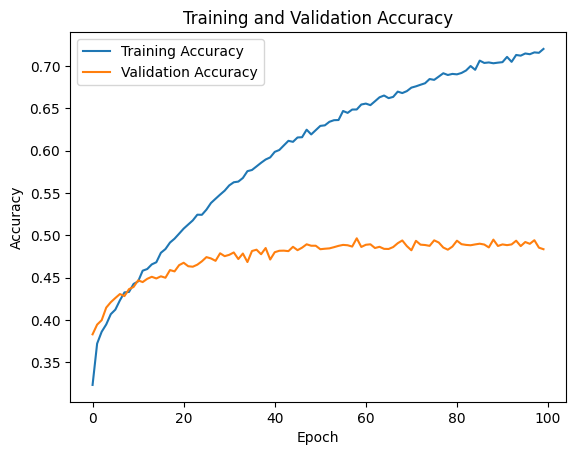

In [ ]:
import matplotlib.pyplot as plt

# plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

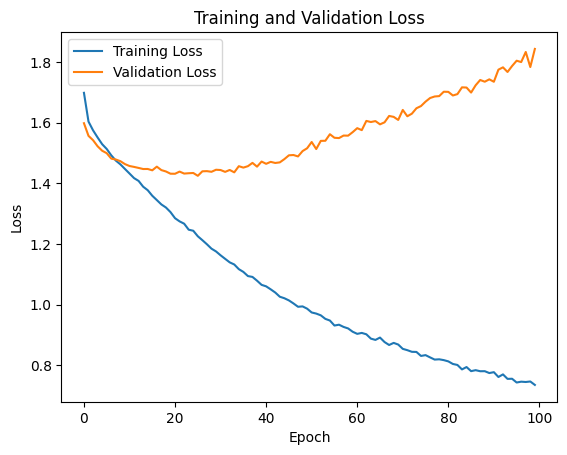

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

221/221 [==============================] - 26s 116ms/step


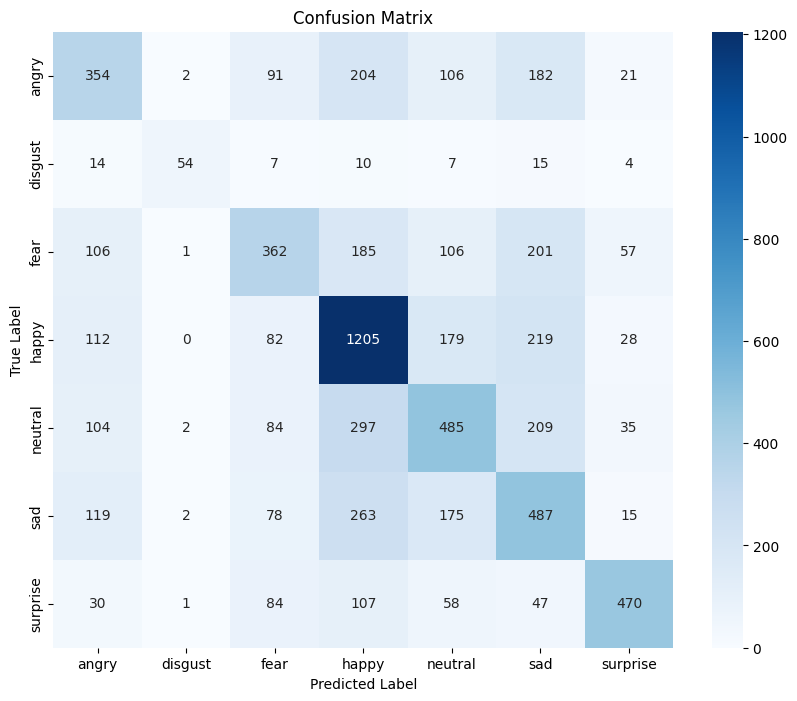

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

# compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

#plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()